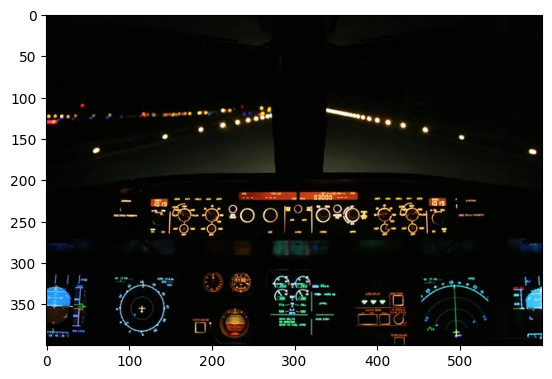

In [614]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('acidente_classification.jpeg'))

## Classifica acidentes aeronáuticos para se predizer qual o período que pode acontecer o acidente.

Os dados utilizados nesse projeto foram analisados, limpos e tratados no projeto:
https://github.com/jairobernardesjunior/Cenipa_limpa_trata_armazena

São dados disponibilizados pelo Cenipa-Centro de Investigação e Prevenção de Acidentes Aeronáuticos da Força Aérea Brasileira.

## Faz análise e reconhecimento dos dados para selecionar as variáveis que vão ser incluidas na classificação em percentual do período que pode ocorrer o acidente.

In [615]:
# importando bibliotecas
from sklearn.preprocessing import (
    OneHotEncoder, # transforma dados categóricos em colunas e valores binário 0-1
    StandardScaler, # faz a padronização dos dados para melhorar a normalidade
    MinMaxScaler, # transforma os valores dentro de uma escala entre 0 e 1 e melhora a normalidade
    PowerTransformer, # transforma os valores para melhorar a normalidade
)
from sklearn.compose import ColumnTransformer

from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import OrdinalEncoder

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandasql import sqldf

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

Essas são as bibliotecas utilizadas nessa primeira fase de reconhecimento e análise dos dados algumas estão inibidas porque foram utilizadas para ver se o resultado seria mais interessante para a padronização dos dados, foram deixadas aqui por haver necessidade futura de serem utilizadas como melhor resultado.

---

In [616]:
# carregando arquivo de acidentes aeronáuticos fornecidos pela cenipa em dataframe
df_acidentes_aero = pd.read_csv('arquivos/df_acidentes_aeronauticos.csv')

In [617]:
# verificando o tamanho do arquivo conferindo a quantidade de linha(registros) e colunas(varáveis)
df_acidentes_aero.shape

(9819, 45)

In [618]:
# reconhecendo as variáveis disponíveis
df_acidentes_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              9819 non-null   float64
 11  ocorrencia_longitude             9819 non-null   float64
 12  aeronave_matricula  

- Verifica-se a quantidade e os nomes das variáveis(colunas) existente no dataframe
- Verifica-se se existe algum nulo em alguma linha do dataframe
- Verifica-se o tipo de variáveis existentes no dataframe

---

In [619]:
df_acidentes_aero['aeronave_ano_fabricacao'] = df_acidentes_aero['aeronave_ano_fabricacao'].astype("string")
df_acidentes_aero['aeronave_fatalidades_total'] = df_acidentes_aero['aeronave_fatalidades_total'].astype("string")

In [620]:
# confirmando a inexistência de nulos
df_acidentes_aero.isnull().sum()

ocorrencia_classificacao              0
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_status                1414
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_latitude                   0
ocorrencia_longitude                  0
aeronave_matricula                    0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    1
aeronave_motor_tipo                   0
aeronave_motor_quantidade             0
aeronave_pmd                          0
aeronave_pmd_categoria                0
aeronave_assentos                     0
aeronave_ano_fabricacao               0
aeronave_pais_fabricante              0
aeronave_pais_registro                0


- No .info() anterior percebemos que a coluna investigação status apresenta 8405 linhas que não tem nulos de um total de 9819 linhas, existindo 1414 linhas com o campo(variável) investigacao_status nulo.
- Temos também uma linha com o campo aeronave_tipo_icao nulo
- Essas variáveis-colunas serão ignoradas mais a frente quando copiarmos somente as colunas que nos interessa para a confecção desse trabalho

---

In [621]:
# verificando se existe linhas duplicadas, linhas idênticas o que poderia atrapalhar na performance
# e também no algorítimo do modelo
# não foi encontrado nenhuma linha duplicada

df_acidentes_aero.duplicated().sum()

0

In [622]:
# checando mais uma vez a dimensão do dataframe
# temos um df com 9819 linhas(registros) e 45 colunas(campos - variáveis)

df_acidentes_aero.shape

(9819, 45)

In [623]:
# verificando o conteúdo das variáveis
# faz o primeiro reconhecimento do conteúdo das variáveis
# vemos que existem várias variáveis categóricas e numéricas, vamos verificar cada uma
# para ver se há possibilidade de usarmos em nosso estudo

df_acidentes_aero.head(2)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,NaN,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-16 21:10:00,NaN,1,NÃO,0.0,0.0,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [624]:
# selecionando somente colunas(variáveis) numéricas
# com essas variáveis plotaremos histogramas para verificar a normalidade da distribuição
# conferindo se podemos utilizar ou não em nosso trabalho de clusterização

df_number = df_acidentes_aero.select_dtypes(include="number").columns
print(len(df_number))
print(df_number)

6
Index(['total_aeronaves_envolvidas', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos'],
      dtype='object')


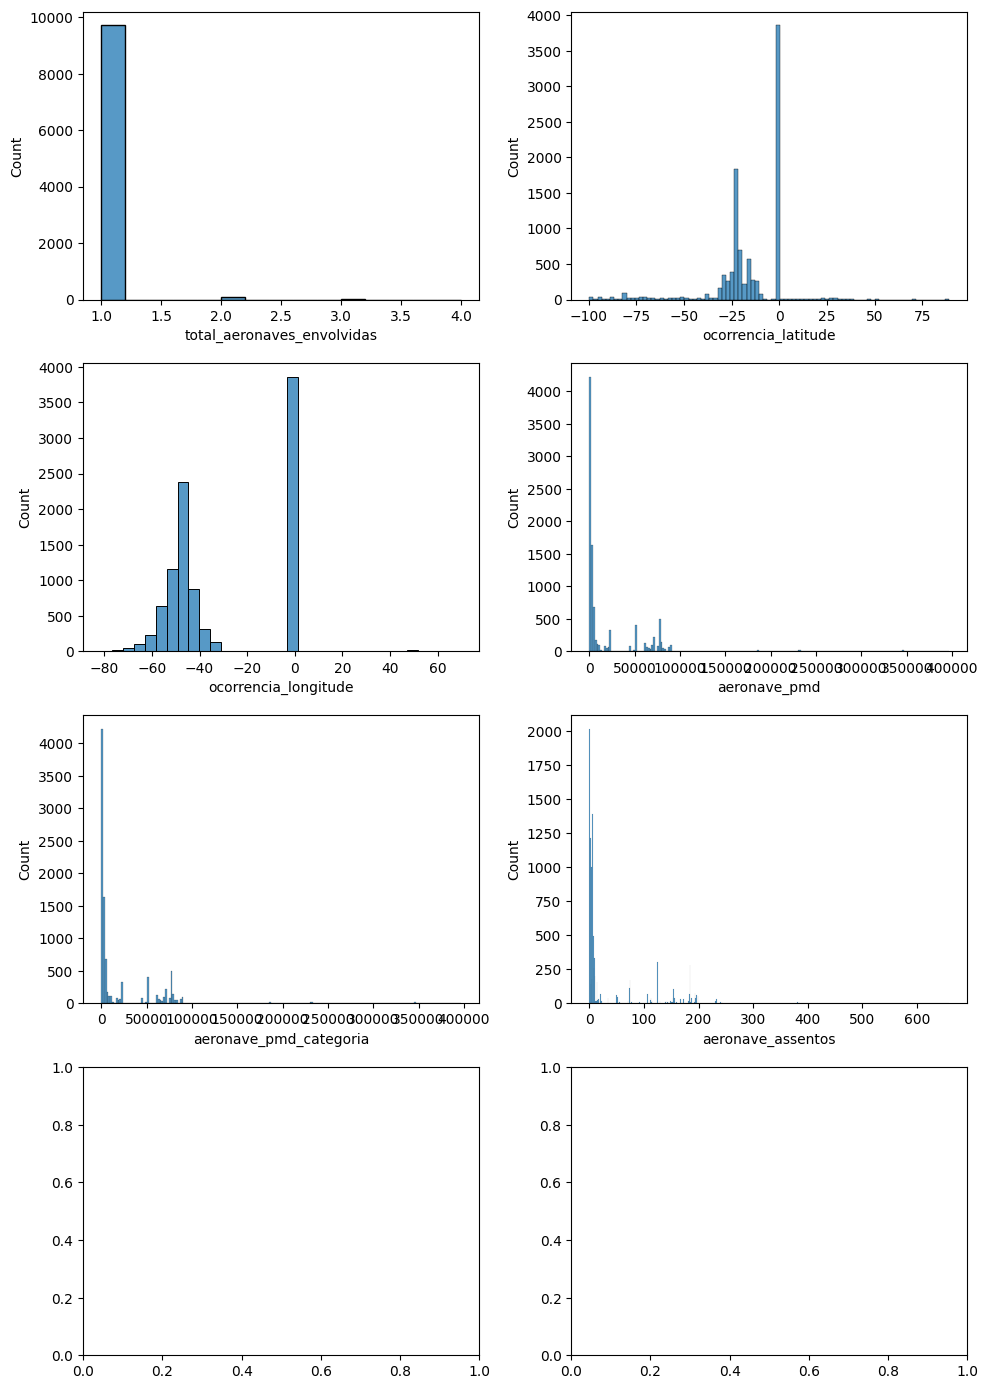

In [625]:
# plotando histogramas de variáveis numéricas
# agora com o data frame que possui somente variáveis numéricas vamos plotar os histogramas dessas variáveis
# para verificar se a distribuição está normalizada

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), df_number):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero)

plt.show()

- Inicialmente vamos escolher 4 variáveis numéricas por apresentarem uma melhor distribuição normal avaliadas inicialmente, sendo que, passarão por transformações para melhorar a distribuição normal e serem aprovadas para a utilização na clusterização de acidentes aeronáuticos, as variáveis são: 'ocorrencia_latitude', 'ocorrencia_longitude',  
 'aeronave_pmd', 'aeronave_assentos'.

---

In [626]:
# listando a primeira linha para servir de referência para montar a lista de variáveis que vão compor
# e participar de nosso estudo

df_acidentes_aero.head(1)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,NaN,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00


In [627]:
# escolhendo as colunas-variáveis categóricas
#print(  'ocorrencia_cidade', df_acidentes_aero['ocorrencia_cidade'].value_counts() )
#print('')
#print(  'ocorrencia_uf', df_acidentes_aero['ocorrencia_uf'].value_counts() )
#print('')
#print(  'ocorrencia_aerodromo', df_acidentes_aero['ocorrencia_aerodromo'].value_counts() )
#print('')
#print(  'aeronave_modelo', df_acidentes_aero['aeronave_modelo'].value_counts() )
#print('')
#print(  'aeronave_ano_fabricacao', df_acidentes_aero['aeronave_ano_fabricacao'].value_counts() )
#print('')
#print(  'aeronave_voo_origem', df_acidentes_aero['aeronave_voo_origem'].value_counts() )
#print('')
#print(  'aeronave_voo_destino', df_acidentes_aero['aeronave_voo_destino'].value_counts() )
#print('')
#print(  'aeronave_fase_operacao', df_acidentes_aero['aeronave_fase_operacao'].value_counts() )
#print('')
#print(  'aeronave_fatalidades_total', df_acidentes_aero['aeronave_fatalidades_total'].value_counts() )
#print('')
#print(  'ocorrencia_tipo', df_acidentes_aero['ocorrencia_tipo'].value_counts() )
#print('')
#print(  'taxonomia_tipo_icao', df_acidentes_aero['taxonomia_tipo_icao'].value_counts() )
#print('')
#print(  'fator_nome', df_acidentes_aero['fator_nome'].value_counts() )
#print('')
#print(  'fator_aspecto', df_acidentes_aero['fator_aspecto'].value_counts() )
#print('')
#print(  'fator_condicionante', df_acidentes_aero['fator_condicionante'].value_counts() )
#print('')
#print(  'fator_area', df_acidentes_aero['fator_area'].value_counts() )

In [628]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['fator_area'].value_counts().to_frame()
x = x[x['count'] < 10]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.fator_area.\
    isin(xlist), 'fator_area'] = '***'  

In [629]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['fator_condicionante'].value_counts().to_frame()
x = x[x['count'] < 10]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.fator_condicionante.\
    isin(xlist), 'fator_condicionante'] = '***'  

In [630]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['fator_aspecto'].value_counts().to_frame()
x = x[x['count'] < 10]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.fator_aspecto.\
    isin(xlist), 'fator_aspecto'] = '***'  

In [631]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['fator_nome'].value_counts().to_frame()
x = x[x['count'] < 100]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.fator_nome.\
    isin(xlist), 'fator_nome'] = '***'  

In [632]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['taxonomia_tipo_icao'].value_counts().to_frame()
x = x[x['count'] < 100]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.taxonomia_tipo_icao.\
    isin(xlist), 'taxonomia_tipo_icao'] = '***'  

In [633]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['ocorrencia_tipo'].value_counts().to_frame()
x = x[x['count'] < 80]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.ocorrencia_tipo.\
    isin(xlist), 'ocorrencia_tipo'] = '***'  

In [634]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_fatalidades_total'].value_counts().to_frame()
x = x[x['count'] < 10]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_fatalidades_total.\
    isin(xlist), 'aeronave_fatalidades_total'] = '***'  

In [635]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_fase_operacao'].value_counts().to_frame()
x = x[x['count'] < 80]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_fase_operacao.\
    isin(xlist), 'aeronave_fase_operacao'] = '***'  

In [636]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_voo_destino'].value_counts().to_frame()
x = x[x['count'] < 80]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_voo_destino.\
    isin(xlist), 'aeronave_voo_destino'] = '***'  

In [637]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_voo_origem'].value_counts().to_frame()
x = x[x['count'] < 80]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_voo_origem.\
    isin(xlist), 'aeronave_voo_origem'] = '***'  

In [638]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_ano_fabricacao'].value_counts().to_frame()
x = x[x['count'] < 300]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_ano_fabricacao.\
    isin(xlist), 'aeronave_ano_fabricacao'] = '***'  

In [639]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_modelo'].value_counts().to_frame()
x = x[x['count'] < 200]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_modelo.\
    isin(xlist), 'aeronave_modelo'] = '***'  

In [640]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['ocorrencia_aerodromo'].value_counts().to_frame()
x = x[x['count'] < 100]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.ocorrencia_aerodromo.\
    isin(xlist), 'ocorrencia_aerodromo'] = '***'  

In [641]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['ocorrencia_uf'].value_counts().to_frame()
x = x[x['count'] < 100]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.ocorrencia_uf.\
    isin(xlist), 'ocorrencia_uf'] = '***'  

In [642]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['ocorrencia_cidade'].value_counts().to_frame()
x = x[x['count'] < 230]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.ocorrencia_cidade.\
    isin(xlist), 'ocorrencia_cidade'] = '***'

In [643]:
# escolhendo as colunas-variáveis categóricas
#print(  'ocorrencia_cidade', df_acidentes_aero['ocorrencia_cidade'].value_counts() )
#print('')
#print(  'ocorrencia_uf', df_acidentes_aero['ocorrencia_uf'].value_counts() )
#print('')
#print(  'ocorrencia_aerodromo', df_acidentes_aero['ocorrencia_aerodromo'].value_counts() )
#print('')
#print(  'aeronave_modelo', df_acidentes_aero['aeronave_modelo'].value_counts() )
#print('')
#print(  'aeronave_ano_fabricacao', df_acidentes_aero['aeronave_ano_fabricacao'].value_counts() )
#print('')
#print(  'aeronave_voo_origem', df_acidentes_aero['aeronave_voo_origem'].value_counts() )
#print('')
#print(  'aeronave_voo_destino', df_acidentes_aero['aeronave_voo_destino'].value_counts() )
#print('')
#print(  'aeronave_fase_operacao', df_acidentes_aero['aeronave_fase_operacao'].value_counts() )
#print('')
#print(  'aeronave_fatalidades_total', df_acidentes_aero['aeronave_fatalidades_total'].value_counts() )
#print('')
#print(  'ocorrencia_tipo', df_acidentes_aero['ocorrencia_tipo'].value_counts() )
#print('')
#print(  'taxonomia_tipo_icao', df_acidentes_aero['taxonomia_tipo_icao'].value_counts() )
#print('')
#print(  'fator_nome', df_acidentes_aero['fator_nome'].value_counts() )
#print('')
#print(  'fator_aspecto', df_acidentes_aero['fator_aspecto'].value_counts() )
#print('')
#print(  'fator_condicionante', df_acidentes_aero['fator_condicionante'].value_counts() )
#print('')
#print(  'fator_area', df_acidentes_aero['fator_area'].value_counts() )

In [644]:
# escolhendo as colunas-variáveis categóricas
#print(  'ocorrencia_classificacao', df_acidentes_aero['ocorrencia_classificacao'].value_counts() )
#print('')
#print(  'ocorrencia_saida_pista', df_acidentes_aero['ocorrencia_saida_pista'].value_counts() ) 
#print('')
#print(  'aeronave_tipo_veiculo', df_acidentes_aero['aeronave_tipo_veiculo'].value_counts() )
#print('')
#print(  'aeronave_motor_tipo', df_acidentes_aero['aeronave_motor_tipo'].value_counts() )
#print('')
#print(  'aeronave_motor_quantidade', df_acidentes_aero['aeronave_motor_quantidade'].value_counts() )
#print('')
#print(  'aeronave_tipo_operacao', df_acidentes_aero['aeronave_tipo_operacao'].value_counts() )
#print('')
#print(  'aeronave_nivel_dano', df_acidentes_aero['aeronave_nivel_dano'].value_counts() )
#print('')
#print(  'periodo', df_acidentes_aero['periodo'].value_counts() )      

- Foi pautado pela quantidade de informações diferentes no caso até 11 pois cada informação se tornará uma coluna quando aplicarmos o oneHotEncoder.
- Outra consideração foi a quantidade de 'não informação' tipo '***' o que simplesmente anularia o sentido do agrupamento quando um campo não identificado tiver a maioria dos registros as demais variáveis-colunas que não entraram nessa escolha é porque não se enquadraram nesses dois critérios

In [645]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_tipo_veiculo'].value_counts().to_frame()
x = x[x['count'] < 100]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_tipo_veiculo.\
    isin(xlist), 'aeronave_tipo_veiculo'] = '***'

In [646]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_motor_tipo'].value_counts().to_frame()
x = x[x['count'] < 100]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_motor_tipo.\
    isin(xlist), 'aeronave_motor_tipo'] = '***'

In [647]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_motor_quantidade'].value_counts().to_frame()
x = x[x['count'] < 200]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_motor_quantidade.\
    isin(xlist), 'aeronave_motor_quantidade'] = '***'

In [648]:
# juntando categorias com pouca ocorrência em categorias comuns
x = df_acidentes_aero['aeronave_tipo_operacao'].value_counts().to_frame()
x = x[x['count'] < 350]
xlist = x.index.values.tolist()
#print(xlist)

df_acidentes_aero.loc[df_acidentes_aero.aeronave_tipo_operacao.\
    isin(xlist), 'aeronave_tipo_operacao'] = '***'

In [650]:
# escolhendo as colunas-variáveis categóricas
#print(  'ocorrencia_classificacao', df_acidentes_aero['ocorrencia_classificacao'].value_counts() )
#print('')
#print(  'ocorrencia_saida_pista', df_acidentes_aero['ocorrencia_saida_pista'].value_counts() ) 
#print('')
#print(  'aeronave_tipo_veiculo', df_acidentes_aero['aeronave_tipo_veiculo'].value_counts() )
#print('')
#print(  'aeronave_motor_tipo', df_acidentes_aero['aeronave_motor_tipo'].value_counts() )
#print('')
#print(  'aeronave_motor_quantidade', df_acidentes_aero['aeronave_motor_quantidade'].value_counts() )
#print('')
#print(  'aeronave_tipo_operacao', df_acidentes_aero['aeronave_tipo_operacao'].value_counts() )
#print('')
#print(  'aeronave_nivel_dano', df_acidentes_aero['aeronave_nivel_dano'].value_counts() )
#print('')
#print(  'periodo', df_acidentes_aero['periodo'].value_counts() )      

In [652]:
# separando as colunas categóricas numa lista e as colunas numéricas em outra, na segunda lista.
colunas_onehot = [
        'ocorrencia_cidade',
        'ocorrencia_uf',
        'ocorrencia_aerodromo',
        'aeronave_modelo',
        'aeronave_ano_fabricacao',
        'aeronave_voo_origem',
        'aeronave_voo_destino',
        'aeronave_fase_operacao',
        'aeronave_fatalidades_total',
        'ocorrencia_tipo',
        'taxonomia_tipo_icao',
        'fator_nome',
        'fator_aspecto',
        'fator_condicionante',
        'fator_area',

        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        ]

colunas_nro = [
        'ocorrencia_latitude',
        'ocorrencia_longitude',  
        'aeronave_pmd',
        'aeronave_assentos',
        ]

- As variáveis estão sendo separadas para que os dados das colunas categóricas possam ser transformadas em colunas binárias com o oneHotEncoder, a lista está na colunas_onehot.
- No caso as colunas numéricas foram escolhidas 4 colunas, na primeira análise feita anteriormente.

---

In [653]:
# copiando somente as colunas do dataframe que foram aprovadas para esse trabalho
df_acidentes_aero = df_acidentes_aero[[
        'ocorrencia_cidade',
        'ocorrencia_uf',
        'ocorrencia_aerodromo',
        'aeronave_modelo',
        'aeronave_ano_fabricacao',
        'aeronave_voo_origem',
        'aeronave_voo_destino',
        'aeronave_fase_operacao',
        'aeronave_fatalidades_total',
        'ocorrencia_tipo',
        'taxonomia_tipo_icao',
        'fator_nome',
        'fator_aspecto',
        'fator_condicionante',
        'fator_area',

        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',     

        'ocorrencia_latitude',
        'ocorrencia_longitude', 
        'aeronave_pmd',
        'aeronave_assentos',        
        ]]

In [654]:
# fazendo um sort por index para colocar todas as linhas em sequência, pois vamos dividir o df mais a frente
df_acidentes_aero = df_acidentes_aero.sort_index()

In [655]:
# verificando se o index ficou ordenado
df_acidentes_aero.head(5)

,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,aeronave_modelo,aeronave_ano_fabricacao,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fatalidades_total,ocorrencia_tipo,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,aeronave_pmd,aeronave_assentos
0,***,PR,SBLO,EMB-810D,***,FORA DE AERODROMO,FORA DE AERODROMO,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,2155,6.0
1,***,PR,***,***,***,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,1315,4.0
2,***,PE,SBRF,***,0.0,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,0,***,SCF-PP,***,***,***,***,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,0,0.0
3,***,PR,SBCT,AB-115,***,FORA DE AERODROMO,FORA DE AERODROMO,***,0,ESTOURO DE PNEU,SCF-NP,***,***,***,***,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0,770,2.0
4,***,PR,***,***,***,FORA DE AERODROMO,FORA DE AERODROMO,TÁXI,0,ESTOURO DE PNEU,SCF-NP,***,***,***,***,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0,3175,10.0


In [656]:
# definindo uma instância do columnTransformer para fazer uma verificação de transformação de variáveis
preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), colunas_onehot),
        #("standard", StandardScaler(), colunas_nro),
        ("minmax", MinMaxScaler(), colunas_nro),
        #("power", PowerTransformer(), colunas_nro),
    ]
)

preprocessing.fit_transform(df_acidentes_aero)

<9819x212 sparse matrix of type '<class 'numpy.float64'>'
	with 253805 stored elements in Compressed Sparse Row format>

- Aqui os dados foram transformados, primeiro as variáveis categóricas em binárias sendo criadas colunas com cada categoria existente e depois as variáveis numéricas foram transformadas em um intervalo entre 0 e 1 afim de melhorar a normalidade.

In [657]:
# fazendo a transformação de variáveis com fit_transform e convertendo para um dataframe
df_acidentes_aero_trans = pd.DataFrame(
    preprocessing.fit_transform(df_acidentes_aero).toarray(),
    columns=preprocessing.get_feature_names_out(), 
)

- Nessa fase as variáveis são transformadas através do fit_transform e convertidos em dataframe sendo armazenadas no dataframe df_acidentes_aero_trans para posterior junção com o dataframe de variáveis categóricas originais.

---

In [658]:
# juntando o dataframe original dos dados categóricos com o dataframe gerado com variáveis transformadas
df_acidentes_aero_trans = pd.concat([df_acidentes_aero, df_acidentes_aero_trans], axis=1)

In [659]:
# criando o objeto ordinalEncoder
oe = OrdinalEncoder()

In [660]:
# criando um df do período numérico sequencial
encoder = OrdinalEncoder(categories=[df_acidentes_aero_trans['periodo'].unique().tolist()])
df_acidentes_aero_trans['periodo_oe'] = encoder.fit_transform(df_acidentes_aero_trans[['periodo']])

In [661]:
df_acidentes_aero_trans['periodo_oe'].unique()

array([0., 1., 2., 3.])

In [662]:
df_acidentes_aero_trans['periodo'].unique()

array(['00:00 às 06:00', '18:00 às 00:00', '12:00 às 18:00',
       '06:00 às 12:00'], dtype=object)

In [663]:
df_acidentes_aero_trans[['periodo', 'periodo_oe']].head(9)

,periodo,periodo_oe
0,00:00 às 06:00,0.0
1,18:00 às 00:00,1.0
2,18:00 às 00:00,1.0
3,00:00 às 06:00,0.0
4,18:00 às 00:00,1.0
5,12:00 às 18:00,2.0
6,00:00 às 06:00,0.0
7,12:00 às 18:00,2.0
8,00:00 às 06:00,0.0


In [664]:
df_acidentes_aero_trans.head(3)

,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,aeronave_modelo,aeronave_ano_fabricacao,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fatalidades_total,ocorrencia_tipo,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,aeronave_pmd,aeronave_assentos,one-hot__ocorrencia_cidade_***,one-hot__ocorrencia_cidade_BELO HORIZONTE,one-hot__ocorrencia_cidade_BRASÍLIA,one-hot__ocorrencia_cidade_CAMPINAS,one-hot__ocorrencia_cidade_GUARULHOS,one-hot__ocorrencia_cidade_RIO DE JANEIRO,one-hot__ocorrencia_cidade_SÃO PAULO,one-hot__ocorrencia_uf_***,one-hot__ocorrencia_uf_AM,one-hot__ocorrencia_uf_BA,one-hot__ocorrencia_uf_CE,one-hot__ocorrencia_uf_DF,one-hot__ocorrencia_uf_ES,one-hot__ocorrencia_uf_GO,one-hot__ocorrencia_uf_MA,one-hot__ocorrencia_uf_MG,one-hot__ocorrencia_uf_MS,one-hot__ocorrencia_uf_MT,one-hot__ocorrencia_uf_PA,one-hot__ocorrencia_uf_PE,one-hot__ocorrencia_uf_PR,one-hot__ocorrencia_uf_RJ,one-hot__ocorrencia_uf_RS,one-hot__ocorrencia_uf_SC,one-hot__ocorrencia_uf_SP,one-hot__ocorrencia_aerodromo_***,one-hot__ocorrencia_aerodromo_**NI,one-hot__ocorrencia_aerodromo_SBBH,one-hot__ocorrencia_aerodromo_SBBR,one-hot__ocorrencia_aerodromo_SBCF,one-hot__ocorrencia_aerodromo_SBCT,one-hot__ocorrencia_aerodromo_SBEG,one-hot__ocorrencia_aerodromo_SBGL,one-hot__ocorrencia_aerodromo_SBGO,one-hot__ocorrencia_aerodromo_SBGR,one-hot__ocorrencia_aerodromo_SBJR,one-hot__ocorrencia_aerodromo_SBKP,one-hot__ocorrencia_aerodromo_SBLO,one-hot__ocorrencia_aerodromo_SBMT,one-hot__ocorrencia_aerodromo_SBPA,one-hot__ocorrencia_aerodromo_SBRF,one-hot__ocorrencia_aerodromo_SBRJ,one-hot__ocorrencia_aerodromo_SBSP,one-hot__ocorrencia_aerodromo_SBSV,one-hot__aeronave_modelo_***,one-hot__aeronave_modelo_737-8EH,one-hot__aeronave_modelo_A320-214,one-hot__aeronave_modelo_AB-115,one-hot__aeronave_modelo_ATR-72-212A,one-hot__aeronave_modelo_EMB-810C,one-hot__aeronave_modelo_EMB-810D,one-hot__aeronave_modelo_ERJ 190-200 IGW,one-hot__aeronave_ano_fabricacao_***,one-hot__aeronave_ano_fabricacao_0.0,one-hot__aeronave_ano_fabricacao_1900.0,one-hot__aeronave_ano_fabricacao_2007.0,one-hot__aeronave_ano_fabricacao_2008.0,one-hot__aeronave_ano_fabricacao_2009.0,one-hot__aeronave_ano_fabricacao_2010.0,one-hot__aeronave_ano_fabricacao_2011.0,one-hot__aeronave_ano_fabricacao_2012.0,one-hot__aeronave_voo_origem_***,one-hot__aeronave_voo_origem_CAMPO DE MARTE - SP,one-hot__aeronave_voo_origem_CARLOS DRUMMOND DE ANDRADE / PAMPULHA,one-hot__aeronave_voo_origem_CONGONHAS,one-hot__aeronave_voo_origem_DEPUTADO LUÍS EDUARDO MAGALHÃES,one-hot__aeronave_voo_origem_FORA DE AERODROMO,one-hot__aeronave_voo_origem_GOVERNADOR ANDRÉ FRANCO MONTORO,one-hot__aeronave_voo_origem_GUARARAPES - GILBERTO FREYRE,one-hot__aeronave_voo_origem_NÃO IDENTIFICADO,one-hot__aeronave_voo_origem_PRESIDENTE JUSCELINO KUBITSCHEK,one-hot__aeronave_voo_origem_SALGADO FILHO,one-hot__aeronave_voo_origem_SANTA GENOVEVA/GOIÂNIA,one-hot__aeronave_voo_origem_SANTOS DUMONT,one-hot__aeronave_voo_origem_TANCREDO NEVES,one-hot__aeronave_voo_origem_VIRACOPOS,one-hot__aeronave_voo_destino_***,one-hot__aeronave_voo_destino_CAMPO DE MARTE - SP,one-hot__aeronave_voo_destino_CONGONHAS,one-hot__aeronave_voo_destino_DEPUTADO LUÍS EDUARDO MAGALHÃES,one-hot__aeronave_voo_destino_FORA DE AERODROMO,one-hot__aeronave_voo_destino_GOVERNADOR ANDRÉ FRANCO MONTORO,one-hot__aeronave_voo_destino_GUARARAPES - GILBERTO FREYRE,one-hot__aeronave_voo_destino_NÃO IDENTIFICADO,one-hot__aeronave_voo_destino_PRESIDENTE JUSCELINO KUBITSCHEK,one-hot__aeronave_voo_destino_SALGADO FILHO,one-hot__aeronave_voo_destino_SANTA GENOVEVA/GOIÂNIA,one-hot__aeronave_voo_destino_SANTOS DUMONT,one-hot__aeronave_voo_destino_TANCREDO NEVES,one-hot__aeronave_voo_destino_VIRACOPOS,one-hot__aeronave_fase_operac

In [665]:
# verificando os dados das primeiras linhas dos dois dataframes juntados
df_acidentes_aero_trans.head(3)

,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,aeronave_modelo,aeronave_ano_fabricacao,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fatalidades_total,ocorrencia_tipo,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,aeronave_pmd,aeronave_assentos,one-hot__ocorrencia_cidade_***,one-hot__ocorrencia_cidade_BELO HORIZONTE,one-hot__ocorrencia_cidade_BRASÍLIA,one-hot__ocorrencia_cidade_CAMPINAS,one-hot__ocorrencia_cidade_GUARULHOS,one-hot__ocorrencia_cidade_RIO DE JANEIRO,one-hot__ocorrencia_cidade_SÃO PAULO,one-hot__ocorrencia_uf_***,one-hot__ocorrencia_uf_AM,one-hot__ocorrencia_uf_BA,one-hot__ocorrencia_uf_CE,one-hot__ocorrencia_uf_DF,one-hot__ocorrencia_uf_ES,one-hot__ocorrencia_uf_GO,one-hot__ocorrencia_uf_MA,one-hot__ocorrencia_uf_MG,one-hot__ocorrencia_uf_MS,one-hot__ocorrencia_uf_MT,one-hot__ocorrencia_uf_PA,one-hot__ocorrencia_uf_PE,one-hot__ocorrencia_uf_PR,one-hot__ocorrencia_uf_RJ,one-hot__ocorrencia_uf_RS,one-hot__ocorrencia_uf_SC,one-hot__ocorrencia_uf_SP,one-hot__ocorrencia_aerodromo_***,one-hot__ocorrencia_aerodromo_**NI,one-hot__ocorrencia_aerodromo_SBBH,one-hot__ocorrencia_aerodromo_SBBR,one-hot__ocorrencia_aerodromo_SBCF,one-hot__ocorrencia_aerodromo_SBCT,one-hot__ocorrencia_aerodromo_SBEG,one-hot__ocorrencia_aerodromo_SBGL,one-hot__ocorrencia_aerodromo_SBGO,one-hot__ocorrencia_aerodromo_SBGR,one-hot__ocorrencia_aerodromo_SBJR,one-hot__ocorrencia_aerodromo_SBKP,one-hot__ocorrencia_aerodromo_SBLO,one-hot__ocorrencia_aerodromo_SBMT,one-hot__ocorrencia_aerodromo_SBPA,one-hot__ocorrencia_aerodromo_SBRF,one-hot__ocorrencia_aerodromo_SBRJ,one-hot__ocorrencia_aerodromo_SBSP,one-hot__ocorrencia_aerodromo_SBSV,one-hot__aeronave_modelo_***,one-hot__aeronave_modelo_737-8EH,one-hot__aeronave_modelo_A320-214,one-hot__aeronave_modelo_AB-115,one-hot__aeronave_modelo_ATR-72-212A,one-hot__aeronave_modelo_EMB-810C,one-hot__aeronave_modelo_EMB-810D,one-hot__aeronave_modelo_ERJ 190-200 IGW,one-hot__aeronave_ano_fabricacao_***,one-hot__aeronave_ano_fabricacao_0.0,one-hot__aeronave_ano_fabricacao_1900.0,one-hot__aeronave_ano_fabricacao_2007.0,one-hot__aeronave_ano_fabricacao_2008.0,one-hot__aeronave_ano_fabricacao_2009.0,one-hot__aeronave_ano_fabricacao_2010.0,one-hot__aeronave_ano_fabricacao_2011.0,one-hot__aeronave_ano_fabricacao_2012.0,one-hot__aeronave_voo_origem_***,one-hot__aeronave_voo_origem_CAMPO DE MARTE - SP,one-hot__aeronave_voo_origem_CARLOS DRUMMOND DE ANDRADE / PAMPULHA,one-hot__aeronave_voo_origem_CONGONHAS,one-hot__aeronave_voo_origem_DEPUTADO LUÍS EDUARDO MAGALHÃES,one-hot__aeronave_voo_origem_FORA DE AERODROMO,one-hot__aeronave_voo_origem_GOVERNADOR ANDRÉ FRANCO MONTORO,one-hot__aeronave_voo_origem_GUARARAPES - GILBERTO FREYRE,one-hot__aeronave_voo_origem_NÃO IDENTIFICADO,one-hot__aeronave_voo_origem_PRESIDENTE JUSCELINO KUBITSCHEK,one-hot__aeronave_voo_origem_SALGADO FILHO,one-hot__aeronave_voo_origem_SANTA GENOVEVA/GOIÂNIA,one-hot__aeronave_voo_origem_SANTOS DUMONT,one-hot__aeronave_voo_origem_TANCREDO NEVES,one-hot__aeronave_voo_origem_VIRACOPOS,one-hot__aeronave_voo_destino_***,one-hot__aeronave_voo_destino_CAMPO DE MARTE - SP,one-hot__aeronave_voo_destino_CONGONHAS,one-hot__aeronave_voo_destino_DEPUTADO LUÍS EDUARDO MAGALHÃES,one-hot__aeronave_voo_destino_FORA DE AERODROMO,one-hot__aeronave_voo_destino_GOVERNADOR ANDRÉ FRANCO MONTORO,one-hot__aeronave_voo_destino_GUARARAPES - GILBERTO FREYRE,one-hot__aeronave_voo_destino_NÃO IDENTIFICADO,one-hot__aeronave_voo_destino_PRESIDENTE JUSCELINO KUBITSCHEK,one-hot__aeronave_voo_destino_SALGADO FILHO,one-hot__aeronave_voo_destino_SANTA GENOVEVA/GOIÂNIA,one-hot__aeronave_voo_destino_SANTOS DUMONT,one-hot__aeronave_voo_destino_TANCREDO NEVES,one-hot__aeronave_voo_destino_VIRACOPOS,one-hot__aeronave_fase_operac

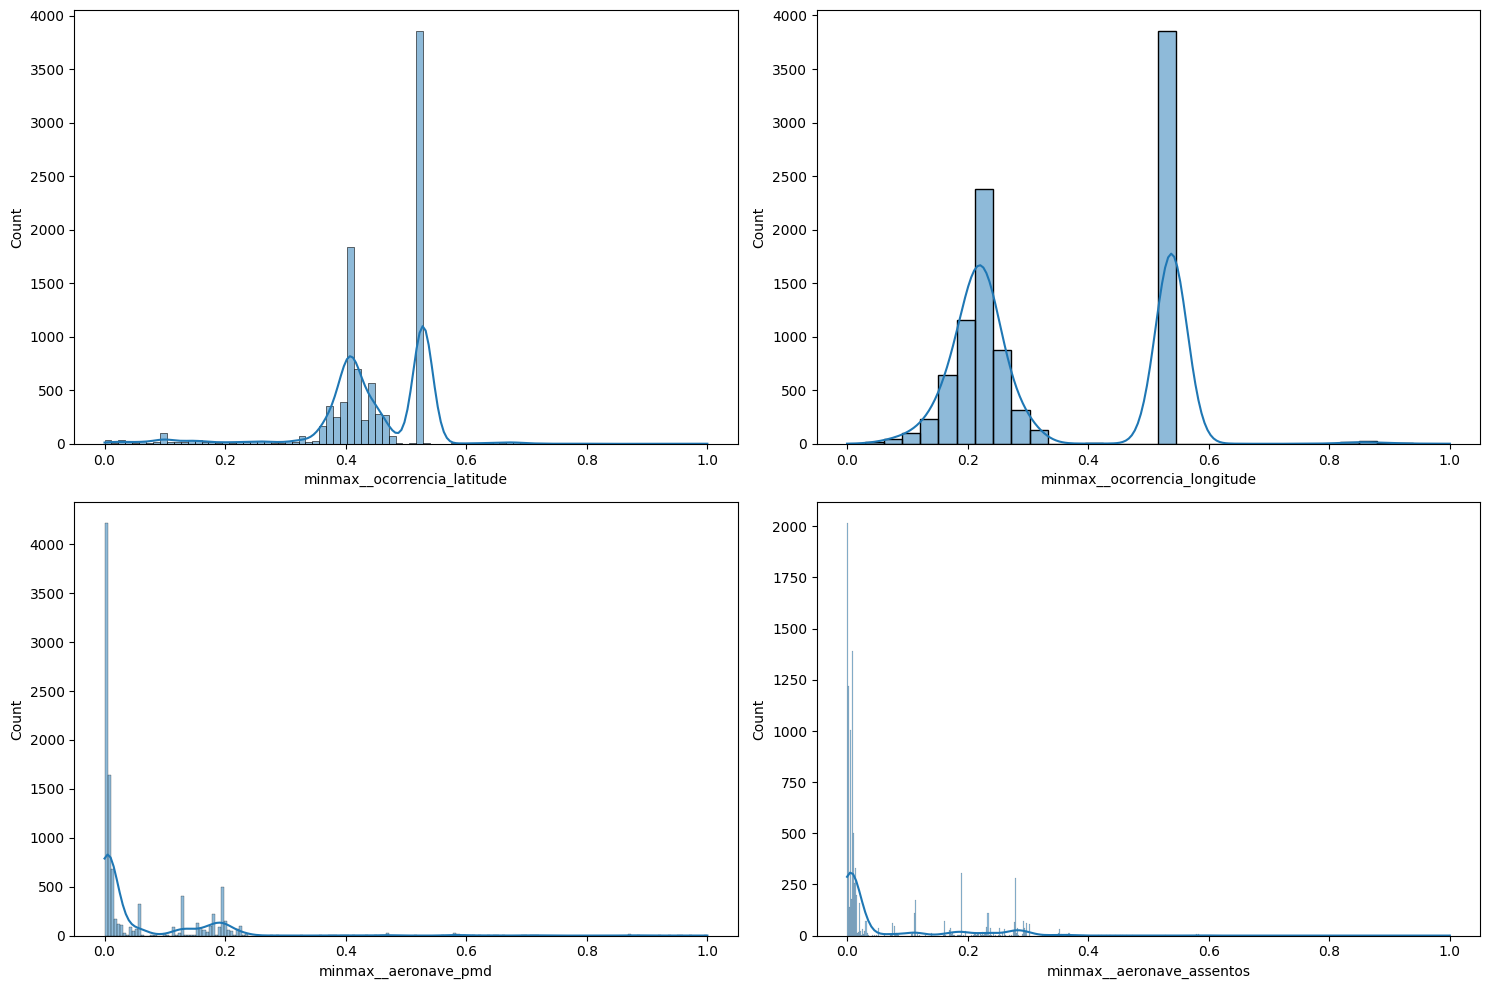

In [666]:
# plotando histogramas de variáveis numéricas tranformadas para melhorar a normalidade
colunas = ["minmax__ocorrencia_latitude", 
           "minmax__ocorrencia_longitude",   
           'minmax__aeronave_pmd',
           'minmax__aeronave_assentos',
           ]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), tight_layout=True)

for ax, feature in zip(axs.flatten(), colunas):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero_trans, kde=True)

plt.show()

- Fazendo uma primeira análise visual dos histogramas verificamos que os dados de minmax_ocorrencia_latitude e minmax_ocorrencia_longitude apresentam uma distribuição mais próxima da normal enquanto minmax_aeronave_pmd e minmax_aeronave assentos já apresenta uma distribuição com assimetria à direita, verificaremos mais adiante se passam no teste do skew e kurtosis.

---

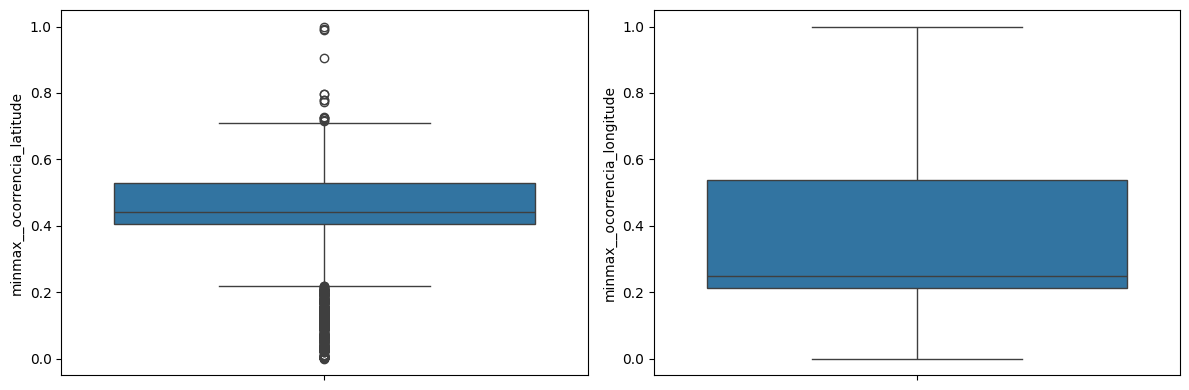

In [667]:
# verificando a existência de outliers e a necessidade de eliminá-los
search_outliers = ["minmax__ocorrencia_latitude", 
                   "minmax__ocorrencia_longitude",                 
                    ]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [668]:
# encontra e elimina os outliers 
def retira_outliers(dfx, x):
    q75,q25 = np.percentile(dfx.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dfx.loc[dfx[x] < min,x] = np.nan
    dfx.loc[dfx[x] > max,x] = np.nan

    dfx = dfx.dropna(axis = 0)
            
    return dfx

In [669]:
# chama função para retirar outliers
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')

In [670]:
# verificando quantos registros restaram depois da eliminação de outliers
df_acidentes_aero_trans.shape

(9357, 240)

- Vemos aqui uma perda de um pouco menos de 500 registros(linhas) com a eliminação dos outliers, ficamos ainda com 9357 registros, ainda temos uma quantidade de registros viável para nosso trabalho.

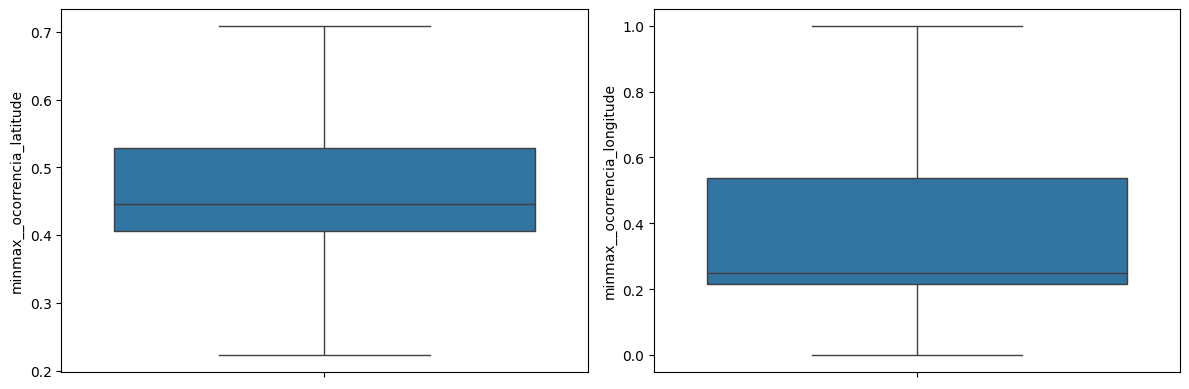

In [671]:
# verificando se sobrou algum outlier depois da exclusão no minmax_ocorrencia_latitude
search_outliers = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

- Aqui fica evidenciado que minmax_ocorrencia_latitude possui inúmeros outliers que precisaram ser eliminados através da função retira_outliers que foi executada 2 vezes para melhor retirar todos os outliers. Esses outliers poderiam comprometer a normalidade da distribuição. Já o campo minmax_ocorrencia_longitude não apresentou nenhum outlier.

In [672]:
# verificando os valores da skew e kurtosis para as variáveis minmax_ocorrencia_latitude e minmax_ocorrencia_longitude
# skew mede o valor da assimetria direita ou esquerda
# kurtosis mede o valor da altura do sino, mais pontiagudo ou mais achatado
# os valores aceitos tanto para skew quanto para kurtosis devem variar entre -2 e 2
print('skew latitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('kurtosis latitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('')
print('skew longitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))
print('kurtosis longitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))

skew latitude -0.16851893611167537
kurtosis latitude -0.14727111704816176

skew longitude 0.3495784340706966
kurtosis longitude -1.4491364551606796


- Vemos aqui que tanto a assimetria quanto a altura do sino ficaram entre -2 e 2, sendo viável a utilização dessas variáveis em nosso trabalho.

---

In [673]:
# salvando o conteudo dos dados tratados até o momento para serem restabelecidos posteriormente se necessário
df_acidentes_aero_trans_salvo = df_acidentes_aero_trans

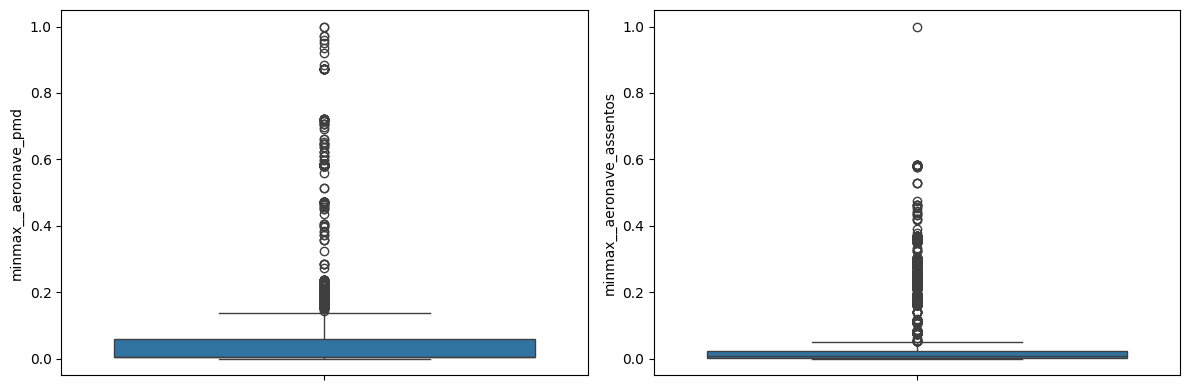

In [674]:
# verificando a existência de outliers em minmax_aeronave_pmd e minmax_aeronave_assentos
search_outliers = ["minmax__aeronave_pmd", 
                   "minmax__aeronave_assentos",                 
                    ]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [675]:
# chamando a função para retirar outliers executa mais de uma vez para retirar o máximo de outliers
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_pmd')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_pmd')

df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_assentos')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_assentos')

In [676]:
# verificando quantos registros sobraram após a retirada de outliers
df_acidentes_aero_trans.shape

(6206, 240)

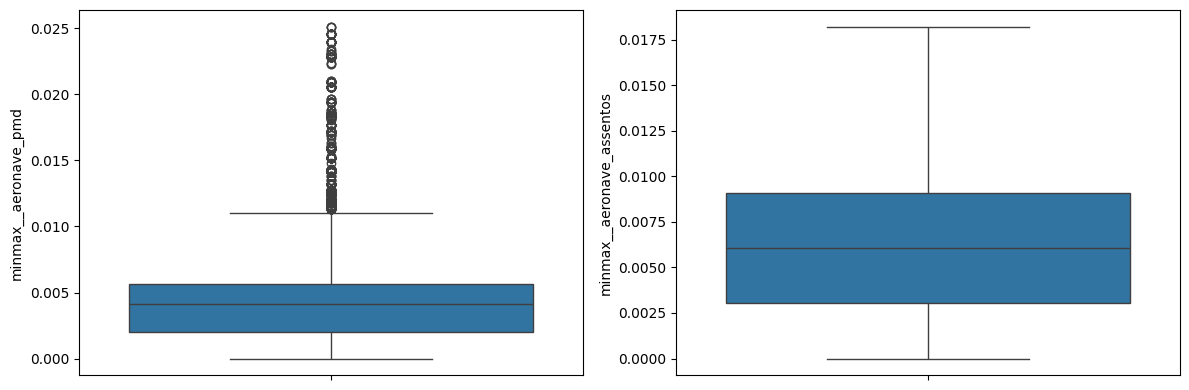

In [677]:
# verificando os outliers que sobraram
search_outliers = ["minmax__aeronave_pmd", "minmax__aeronave_assentos"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

- Vemos que na redução de outliers da variável minmax_aeronave_pmd houve uma perda de mais de 3000 registros(linhas) de nosso dataframe e ainda sobraram uma quantidade grande de outliers em minmax_aeronave_pmd, dessa forma, devido a grande perda de linhas não vamos utilizar essa variável em nosso trabalho.

---

In [678]:
# verificando os valores da skew e kurtosis
# os valores aceitos tanto para skew quanto para kurtosis devem variar entre -2 e 2
print('skew latitude', skew(df_acidentes_aero_trans['minmax__aeronave_assentos'], axis=0, bias=True))
print('kurtosis latitude',kurtosis(df_acidentes_aero_trans['minmax__aeronave_assentos'], axis=0, bias=True))

skew latitude 0.4635532696298526
kurtosis latitude -0.6099728629747303


In [679]:
# recupera o dataframe salvo anteriormente e elimina as colunas que não entrarão em nosso trabalho
df_acidentes_aero_trans = df_acidentes_aero_trans_salvo.drop([
    'aeronave_pmd', 'minmax__aeronave_pmd'], axis=1)

In [680]:
# retirando novamente os outliers da variável minmax__aeronave_assentos
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_assentos')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__aeronave_assentos')

In [681]:
# verificando quantas linhas sobraram
df_acidentes_aero_trans.shape

(6888, 238)

In [682]:
# verifica as primeiras linhas do dataframe recuperado
df_acidentes_aero_trans.head(5)

,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,aeronave_modelo,aeronave_ano_fabricacao,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_fatalidades_total,ocorrencia_tipo,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,aeronave_assentos,one-hot__ocorrencia_cidade_***,one-hot__ocorrencia_cidade_BELO HORIZONTE,one-hot__ocorrencia_cidade_BRASÍLIA,one-hot__ocorrencia_cidade_CAMPINAS,one-hot__ocorrencia_cidade_GUARULHOS,one-hot__ocorrencia_cidade_RIO DE JANEIRO,one-hot__ocorrencia_cidade_SÃO PAULO,one-hot__ocorrencia_uf_***,one-hot__ocorrencia_uf_AM,one-hot__ocorrencia_uf_BA,one-hot__ocorrencia_uf_CE,one-hot__ocorrencia_uf_DF,one-hot__ocorrencia_uf_ES,one-hot__ocorrencia_uf_GO,one-hot__ocorrencia_uf_MA,one-hot__ocorrencia_uf_MG,one-hot__ocorrencia_uf_MS,one-hot__ocorrencia_uf_MT,one-hot__ocorrencia_uf_PA,one-hot__ocorrencia_uf_PE,one-hot__ocorrencia_uf_PR,one-hot__ocorrencia_uf_RJ,one-hot__ocorrencia_uf_RS,one-hot__ocorrencia_uf_SC,one-hot__ocorrencia_uf_SP,one-hot__ocorrencia_aerodromo_***,one-hot__ocorrencia_aerodromo_**NI,one-hot__ocorrencia_aerodromo_SBBH,one-hot__ocorrencia_aerodromo_SBBR,one-hot__ocorrencia_aerodromo_SBCF,one-hot__ocorrencia_aerodromo_SBCT,one-hot__ocorrencia_aerodromo_SBEG,one-hot__ocorrencia_aerodromo_SBGL,one-hot__ocorrencia_aerodromo_SBGO,one-hot__ocorrencia_aerodromo_SBGR,one-hot__ocorrencia_aerodromo_SBJR,one-hot__ocorrencia_aerodromo_SBKP,one-hot__ocorrencia_aerodromo_SBLO,one-hot__ocorrencia_aerodromo_SBMT,one-hot__ocorrencia_aerodromo_SBPA,one-hot__ocorrencia_aerodromo_SBRF,one-hot__ocorrencia_aerodromo_SBRJ,one-hot__ocorrencia_aerodromo_SBSP,one-hot__ocorrencia_aerodromo_SBSV,one-hot__aeronave_modelo_***,one-hot__aeronave_modelo_737-8EH,one-hot__aeronave_modelo_A320-214,one-hot__aeronave_modelo_AB-115,one-hot__aeronave_modelo_ATR-72-212A,one-hot__aeronave_modelo_EMB-810C,one-hot__aeronave_modelo_EMB-810D,one-hot__aeronave_modelo_ERJ 190-200 IGW,one-hot__aeronave_ano_fabricacao_***,one-hot__aeronave_ano_fabricacao_0.0,one-hot__aeronave_ano_fabricacao_1900.0,one-hot__aeronave_ano_fabricacao_2007.0,one-hot__aeronave_ano_fabricacao_2008.0,one-hot__aeronave_ano_fabricacao_2009.0,one-hot__aeronave_ano_fabricacao_2010.0,one-hot__aeronave_ano_fabricacao_2011.0,one-hot__aeronave_ano_fabricacao_2012.0,one-hot__aeronave_voo_origem_***,one-hot__aeronave_voo_origem_CAMPO DE MARTE - SP,one-hot__aeronave_voo_origem_CARLOS DRUMMOND DE ANDRADE / PAMPULHA,one-hot__aeronave_voo_origem_CONGONHAS,one-hot__aeronave_voo_origem_DEPUTADO LUÍS EDUARDO MAGALHÃES,one-hot__aeronave_voo_origem_FORA DE AERODROMO,one-hot__aeronave_voo_origem_GOVERNADOR ANDRÉ FRANCO MONTORO,one-hot__aeronave_voo_origem_GUARARAPES - GILBERTO FREYRE,one-hot__aeronave_voo_origem_NÃO IDENTIFICADO,one-hot__aeronave_voo_origem_PRESIDENTE JUSCELINO KUBITSCHEK,one-hot__aeronave_voo_origem_SALGADO FILHO,one-hot__aeronave_voo_origem_SANTA GENOVEVA/GOIÂNIA,one-hot__aeronave_voo_origem_SANTOS DUMONT,one-hot__aeronave_voo_origem_TANCREDO NEVES,one-hot__aeronave_voo_origem_VIRACOPOS,one-hot__aeronave_voo_destino_***,one-hot__aeronave_voo_destino_CAMPO DE MARTE - SP,one-hot__aeronave_voo_destino_CONGONHAS,one-hot__aeronave_voo_destino_DEPUTADO LUÍS EDUARDO MAGALHÃES,one-hot__aeronave_voo_destino_FORA DE AERODROMO,one-hot__aeronave_voo_destino_GOVERNADOR ANDRÉ FRANCO MONTORO,one-hot__aeronave_voo_destino_GUARARAPES - GILBERTO FREYRE,one-hot__aeronave_voo_destino_NÃO IDENTIFICADO,one-hot__aeronave_voo_destino_PRESIDENTE JUSCELINO KUBITSCHEK,one-hot__aeronave_voo_destino_SALGADO FILHO,one-hot__aeronave_voo_destino_SANTA GENOVEVA/GOIÂNIA,one-hot__aeronave_voo_destino_SANTOS DUMONT,one-hot__aeronave_voo_destino_TANCREDO NEVES,one-hot__aeronave_voo_destino_VIRACOPOS,one-hot__aeronave_fase_operacao_***,one-ho

In [683]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_acidentes_aero_trans.sort_index().to_csv('arquivos_tratados/df_acidentes_aero_trans.csv', index=False)